Data Analysis M2 Project - 
Data comes from https://www.kaggle.com/datasets/varpit94/breaking-bad-tv-show-all-seasons-episodes-data


Looking at the data set to find the Imdb rating per episode.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt



Importing the data.

In [2]:
breaking_bad = pd.read_csv("breaking_bad.csv", encoding = "latin-1")



Displaying the data's head and tail.

In [3]:
breaking_bad.head(5)

,Date,Season,Episode,Title,Directed by,Written by,Duration_mins,Summary,Rating_IMDB,U.S. viewers_million
0,20-Jan-08,1,1,Pilot,Vince Gilligan,Vince Gilligan,58,"Diagnosed with terminal lung cancer, chemistry...",9.1,1.41
1,27-Jan-08,1,2,Cat's in the Bag...,Adam Bernstein,Vince Gilligan,48,After their first drug deal goes terribly wron...,8.7,1.49
2,10-Feb-08,1,3,...And the Bag's in the River,Adam Bernstein,Vince Gilligan,48,Walt and Jesse clean up after the bathtub inci...,8.8,1.08
3,17-Feb-08,1,4,Cancer Man,Jim McKay,Vince Gilligan,48,Walt tells the rest of his family about his ca...,8.3,1.09
4,24-Feb-08,1,5,Gray Matter,Tricia Brock,"Vince Gilligan, Patty Lin",48,Walt rejects everyone who tries to help him wi...,8.4,0.97


In [4]:
breaking_bad.tail(5)

,Date,Season,Episode,Title,Directed by,Written by,Duration_mins,Summary,Rating_IMDB,U.S. viewers_million
57,01-Sep-13,5,12,Rabid Dog,Sam Catlin,"Vince Gilligan, Sam Catlin",48,Walt discovers Jesse broke into his house and ...,9.2,4.41
58,08-Sep-13,5,13,To'hajiilee,Michelle MacLaren,"Vince Gilligan, George Mastras",47,Jesse and Hank come up with an idea to take Wa...,9.8,5.11
59,15-Sep-13,5,14,Ozymandias,Rian Johnson,"Vince Gilligan, Moira Walley-Beckett",48,Walt goes on the run. Jesse is taken hostage. ...,10.0,6.37
60,22-Sep-13,5,15,Granite State,Peter Gould,"Vince Gilligan, Peter Gould",55,Walt struggles as he adapts to aspects of his ...,9.7,6.58
61,29-Sep-13,5,16,Felina,Vince Gilligan,Vince Gilligan,55,Walter White makes one last attempt to secure ...,9.9,10.28


Checking column names.

In [5]:
breaking_bad.columns

Index(['Date', 'Season', 'Episode', 'Title', 'Directed by', 'Written by',
       'Duration_mins', 'Summary', 'Rating_IMDB', 'U.S. viewers_million'],
      dtype='object')

Cleaning column names.

In [6]:
breaking_bad.columns = breaking_bad.columns.str.title() .str.strip() .str.replace('_', ' ')
breaking_bad.columns 

Index(['Date', 'Season', 'Episode', 'Title', 'Directed By', 'Written By',
       'Duration Mins', 'Summary', 'Rating Imdb', 'U.S. Viewers Million'],
      dtype='object')

Changing the date to datetime.

In [7]:
breaking_bad['Date'] = pd.to_datetime(breaking_bad['Date'], format='mixed')
breaking_bad.head(5)

,Date,Season,Episode,Title,Directed By,Written By,Duration Mins,Summary,Rating Imdb,U.S. Viewers Million
0,2008-01-20,1,1,Pilot,Vince Gilligan,Vince Gilligan,58,"Diagnosed with terminal lung cancer, chemistry...",9.1,1.41
1,2008-01-27,1,2,Cat's in the Bag...,Adam Bernstein,Vince Gilligan,48,After their first drug deal goes terribly wron...,8.7,1.49
2,2008-02-10,1,3,...And the Bag's in the River,Adam Bernstein,Vince Gilligan,48,Walt and Jesse clean up after the bathtub inci...,8.8,1.08
3,2008-02-17,1,4,Cancer Man,Jim McKay,Vince Gilligan,48,Walt tells the rest of his family about his ca...,8.3,1.09
4,2008-02-24,1,5,Gray Matter,Tricia Brock,"Vince Gilligan, Patty Lin",48,Walt rejects everyone who tries to help him wi...,8.4,0.97


Creating a new column that combines the season and episode columns together.

In [8]:
breaking_bad['Season Episode'] = breaking_bad['Season'].astype(str) + '/' + breaking_bad['Episode'].astype(str).str.zfill(2)
breaking_bad.tail(5)


,Date,Season,Episode,Title,Directed By,Written By,Duration Mins,Summary,Rating Imdb,U.S. Viewers Million,Season Episode
57,2013-09-01,5,12,Rabid Dog,Sam Catlin,"Vince Gilligan, Sam Catlin",48,Walt discovers Jesse broke into his house and ...,9.2,4.41,5/12
58,2013-09-08,5,13,To'hajiilee,Michelle MacLaren,"Vince Gilligan, George Mastras",47,Jesse and Hank come up with an idea to take Wa...,9.8,5.11,5/13
59,2013-09-15,5,14,Ozymandias,Rian Johnson,"Vince Gilligan, Moira Walley-Beckett",48,Walt goes on the run. Jesse is taken hostage. ...,10.0,6.37,5/14
60,2013-09-22,5,15,Granite State,Peter Gould,"Vince Gilligan, Peter Gould",55,Walt struggles as he adapts to aspects of his ...,9.7,6.58,5/15
61,2013-09-29,5,16,Felina,Vince Gilligan,Vince Gilligan,55,Walter White makes one last attempt to secure ...,9.9,10.28,5/16


Dataframe info.

In [9]:
breaking_bad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  62 non-null     datetime64[ns]
 1   Season                62 non-null     int64         
 2   Episode               62 non-null     int64         
 3   Title                 62 non-null     object        
 4   Directed By           62 non-null     object        
 5   Written By            62 non-null     object        
 6   Duration Mins         62 non-null     int64         
 7   Summary               62 non-null     object        
 8   Rating Imdb           62 non-null     float64       
 9   U.S. Viewers Million  57 non-null     float64       
 10  Season Episode        62 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 5.5+ KB


Stats of all the numerical values.

In [10]:
breaking_bad.describe()

,Date,Season,Episode,Duration Mins,Rating Imdb,U.S. Viewers Million
count,62,62.000000,62.000000,62.000000,62.000000,57.000000
mean,2010-11-13 13:09:40.645161216,3.290323,7.048387,47.919355,9.022581,2.324386
min,2008-01-20 00:00:00,1.000000,1.000000,43.000000,7.800000,0.970000
25%,2009-05-04 18:00:00,2.000000,4.000000,47.000000,8.700000,1.460000
50%,2010-06-02 12:00:00,3.000000,7.000000,47.000000,8.900000,1.710000
75%,2012-05-06 00:00:00,4.750000,10.000000,48.000000,9.450000,2.290000
max,2013-09-29 00:00:00,5.000000,16.000000,60.000000,10.000000,10.280000
std,NaN,1.359690,4.074822,2.632074,0.511962,1.719224


Checking for nulls or na data.

In [11]:
breaking_bad.isna().sum()

Date                    0
Season                  0
Episode                 0
Title                   0
Directed By             0
Written By              0
Duration Mins           0
Summary                 0
Rating Imdb             0
U.S. Viewers Million    5
Season Episode          0
dtype: int64

Filling missing values with the mean of viewership.

In [12]:
breaking_bad['U.S. Viewers Million'].fillna(breaking_bad['U.S. Viewers Million'].mean(), inplace=True)

C:\Users\vpool\AppData\Local\Temp\ipykernel_10260\4150376568.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  breaking_bad['U.S. Viewers Million'].fillna(breaking_bad['U.S. Viewers Million'].mean(), inplace=True)


Removing unnecessary columns.

In [13]:
cols_to_drop = ['Title', 'Directed By', 'Written By', 'Duration Mins', 'Summary', 'Season', 'Episode']

breaking_bad_drop = breaking_bad.drop(columns = cols_to_drop)

breaking_bad_drop


,Date,Rating Imdb,U.S. Viewers Million,Season Episode
0,2008-01-20,9.1,1.41,1/01
1,2008-01-27,8.7,1.49,1/02
2,2008-02-10,8.8,1.08,1/03
3,2008-02-17,8.3,1.09,1/04
4,2008-02-24,8.4,0.97,1/05
...,...,...,...,...
57,2013-09-01,9.2,4.41,5/12
58,2013-09-08,9.8,5.11,5/13
59,2013-09-15,10.0,6.37,5/14
60,2013-09-22,9.7,6.58,5/15


Plotting the ratings info.

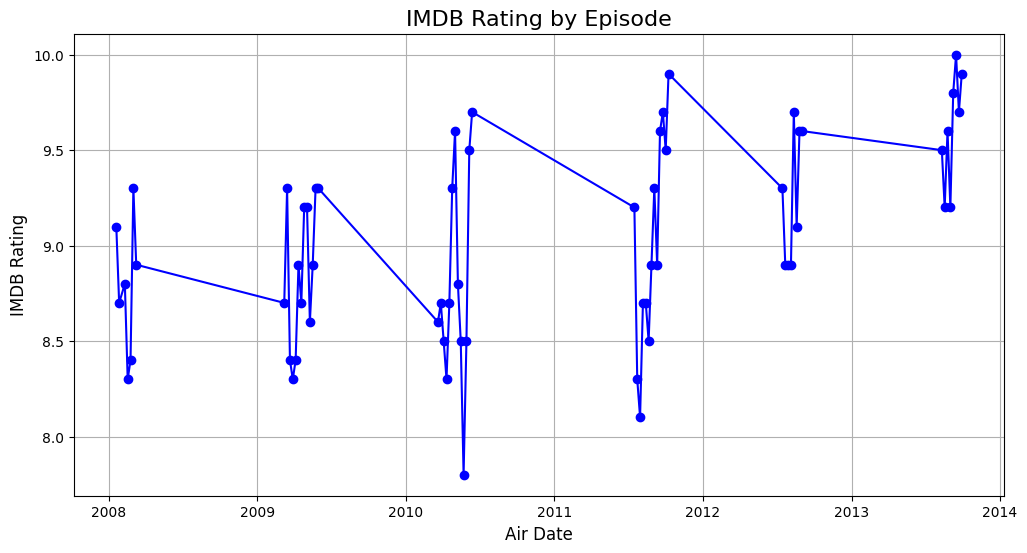

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(breaking_bad_drop['Date'], breaking_bad_drop['Rating Imdb'], marker='o', linestyle='-', color='b')
plt.title('IMDB Rating by Episode', fontsize=16)
plt.xlabel('Air Date', fontsize=12)
plt.ylabel('IMDB Rating', fontsize=12)
plt.grid(True)
plt.show()

Extract season data to make plot easier to read and seperate it by season.

In [15]:
breaking_bad_drop['Extracted Season'] = breaking_bad_drop['Season Episode'].str.extract(r'(\d+)/')[0].astype(int)

breaking_bad_drop

,Date,Rating Imdb,U.S. Viewers Million,Season Episode,Extracted Season
0,2008-01-20,9.1,1.41,1/01,1
1,2008-01-27,8.7,1.49,1/02,1
2,2008-02-10,8.8,1.08,1/03,1
3,2008-02-17,8.3,1.09,1/04,1
4,2008-02-24,8.4,0.97,1/05,1
...,...,...,...,...,...
57,2013-09-01,9.2,4.41,5/12,5
58,2013-09-08,9.8,5.11,5/13,5
59,2013-09-15,10.0,6.37,5/14,5
60,2013-09-22,9.7,6.58,5/15,5


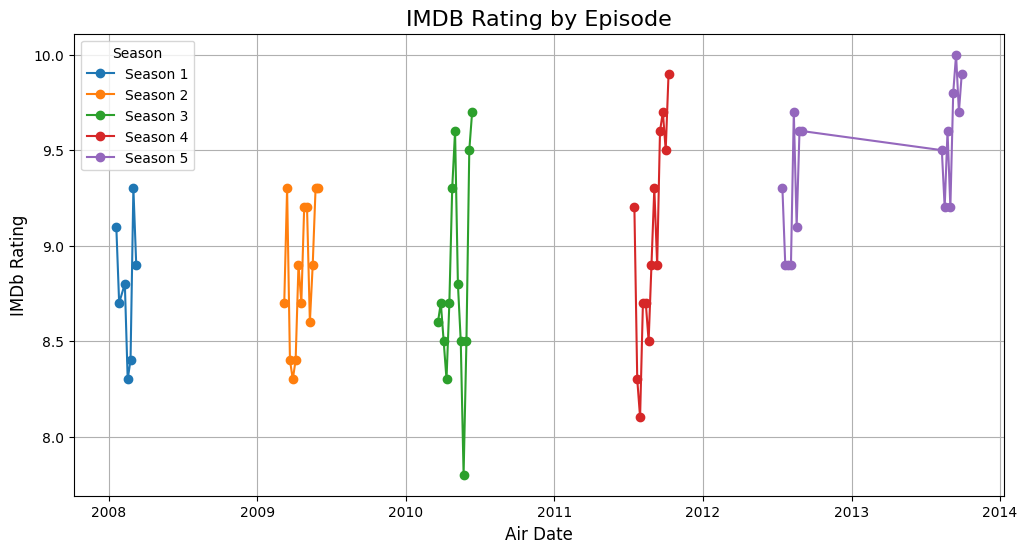

In [16]:
plt.figure(figsize=(12, 6))
for season in breaking_bad_drop['Extracted Season'].unique():
    season_data = breaking_bad_drop[breaking_bad_drop['Extracted Season'] == season]
    plt.plot(season_data['Date'], season_data['Rating Imdb'], marker='o', linestyle='-', label=f'Season {season}')
plt.title('IMDB Rating by Episode', fontsize=16)
plt.xlabel('Air Date', fontsize=12)
plt.ylabel('IMDb Rating', fontsize=12)
plt.legend(title='Season')
plt.grid(True)
plt.show()

An additional plot showing the viewership of the episodes.

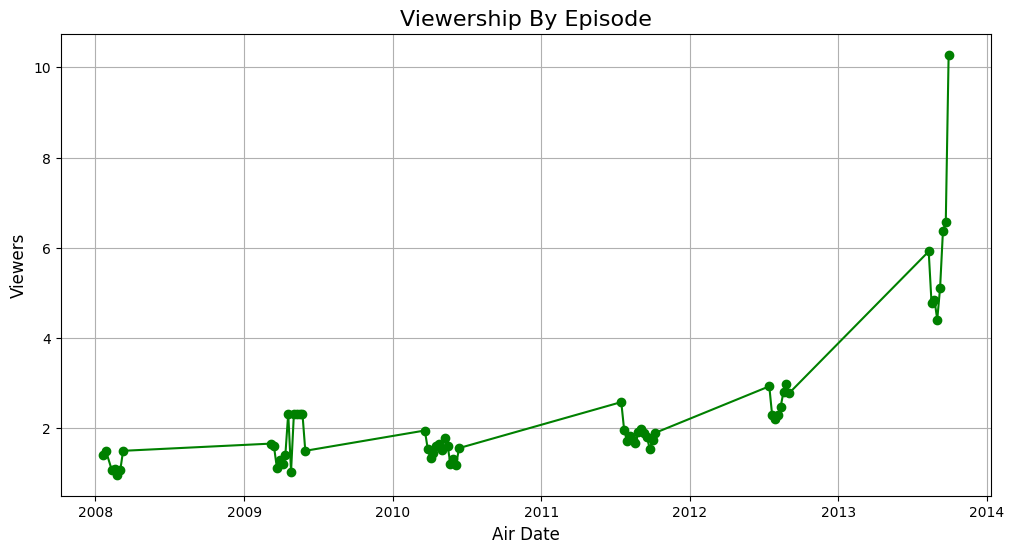

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(breaking_bad_drop['Date'], breaking_bad['U.S. Viewers Million'], marker='o', linestyle='-', color='g')
plt.title('Viewership By Episode', fontsize=16)
plt.xlabel('Air Date', fontsize=12)
plt.ylabel('Viewers', fontsize=12)
plt.grid(True)
plt.show()